In [69]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [70]:
all_df = pd.read_csv("data/weather.csv")

In [71]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [72]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [73]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [74]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [75]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [76]:
train_Label[:4]

array([1, 1, 0, 1])

In [77]:
train_Features.shape

(95672, 13)

In [78]:
test_Label[:4]

array([1, 0, 0, 0])

In [79]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [80]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [81]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [82]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [83]:
model = Sequential()

In [84]:
model.add(Conv1D(filters=39*4,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(13,1),
                 activation='relu'))

In [85]:
model.add(MaxPooling1D(pool_size=1))

In [86]:
model.add(Conv1D(filters=39*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [87]:
model.add(MaxPooling1D(pool_size=1))

In [88]:
model.add(Conv1D(filters=39*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [89]:
model.add(MaxPooling1D(pool_size=1))

In [90]:
model.add(Conv1D(filters=39,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [91]:
model.add(MaxPooling1D(pool_size=1))

In [92]:
model.add(Flatten())

In [93]:
model.add(Dense(13, activation='tanh'))

In [94]:
model.add(Dense(2,activation='sigmoid'))

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 11, 156)           624       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 11, 156)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 9, 117)            54873     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 9, 117)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 7, 78)             27456     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 7, 78)             0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 5, 39)             9165      
__________

In [96]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [97]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 76537 samples, validate on 19135 samples
Epoch 1/60
76537/76537 [==============================] - 28s 372us/step - loss: 0.4199 - acc: 0.8233 - val_loss: 0.3656 - val_acc: 0.8443
Epoch 2/60
76537/76537 [==============================] - 44s 570us/step - loss: 0.3573 - acc: 0.8499 - val_loss: 0.3563 - val_acc: 0.8483
Epoch 3/60
76537/76537 [==============================] - 51s 669us/step - loss: 0.3497 - acc: 0.8522 - val_loss: 0.3508 - val_acc: 0.8501
Epoch 4/60
76537/76537 [==============================] - 59s 774us/step - loss: 0.3465 - acc: 0.8533 - val_loss: 0.3584 - val_acc: 0.8486
Epoch 5/60
76537/76537 [==============================] - 62s 812us/step - loss: 0.3449 - acc: 0.8540 - val_loss: 0.3503 - val_acc: 0.8482
Epoch 6/60
76537/76537 [==============================] - 56s 737us/step - loss: 0.3425 - acc: 0.8534 - val_loss: 0.3452 - val_acc: 0.8530
Epoch 7/60
76537/76537 [==============================] - 30s 389us/step - loss: 0.3409 - acc: 0.8549 - val_loss: 0.

In [98]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

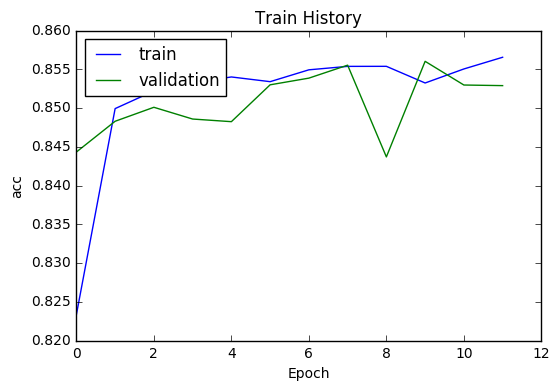

In [99]:
show_train_history(train_history,'acc','val_acc')

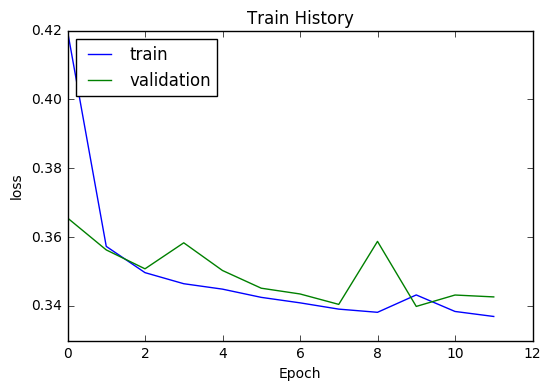

In [100]:
show_train_history(train_history,'loss','val_loss')

In [101]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 6s 270us/step


In [102]:
scores[1]

0.8512208378726657